In [6]:
from sklearn.decomposition import PCA
import numpy as np
import matplotlib.pyplot as plt
import torch

#PATHS
VIT_PATH = '/home/maria/ProjectionSort/data/google_vit-base-patch16-224_embeddings_logits.pkl'
NEURAL_PATH = '/home/maria/ProjectionSort/data/hybrid_neural_responses_reduced.npy'
AREAS_PATH = '/home/maria/ProjectionSort/data/brain_area.npy'  


# Load data
vit = np.load(VIT_PATH, allow_pickle=True)['natural_scenes']
R = np.load(NEURAL_PATH)            # shape: (images, neurons)
areas = np.load(AREAS_PATH, allow_pickle=True)         # shape: (neurons,)

pca = PCA(n_components=10)
vit_pcs = pca.fit_transform(vit)
v = pca.components_[0]    # PC1 vector in ViT space

vit_scores = vit @ v      # shape (images,)

In [47]:
print(R.shape)

(39209, 118)


In [7]:
vit_scores[:10]

array([30.939766  , 22.34697   , 27.295795  , 10.183241  ,  0.08484447,
       30.611357  , 24.001743  , 29.11712   , 11.865734  , 18.130217  ],
      dtype=float32)

In [10]:
def make_pairs(scores):
    pairs = []
    for i in range(len(scores)):
        for j in range(len(scores)):
            if scores[i] > scores[j]:
                pairs.append((i, j))
    return pairs

pairs = make_pairs(vit_scores)
print("Total ranking pairs:", len(pairs))
print("Example:", pairs[:5])


Total ranking pairs: 6903
Example: [(0, 1), (0, 2), (0, 3), (0, 4), (0, 5)]


(118, 1000)
[1423, 3182, 5080]
[[ -73.49532653   57.18721963  -49.67945249 ...   88.96969201
   -30.5416027   -29.54175249]
 [-100.74936635 -100.71602742   10.33325307 ...  -19.50296774
    -2.46021519 -180.56134422]
 [ -79.69789557   51.51022367   46.45866336 ...  159.34812581
   -16.92831564 -100.31205342]]
(3, 1000)


(array([  1.,   0.,   1.,   0.,   0.,   0.,   1.,   2.,   0.,   1.,   2.,
          1.,   4.,   2.,   1.,   3.,   3.,   4.,   5.,   7.,   9.,   6.,
         12.,   8.,  23.,  16.,  26.,  23.,  23.,  22.,  27.,  39.,  34.,
         34.,  37.,  54.,  54.,  65.,  74.,  73.,  71.,  72.,  95.,  88.,
         87.,  99.,  86.,  95.,  94.,  93., 117.,  89., 108.,  84.,  98.,
         73.,  91.,  81.,  70.,  69.,  57.,  53.,  48.,  47.,  41.,  47.,
         38.,  21.,  17.,  29.,  21.,  15.,  12.,  16.,  15.,   8.,  12.,
         10.,   7.,   6.,   4.,   3.,   3.,   3.,   2.,   1.,   0.,   2.,
          1.,   0.,   0.,   0.,   0.,   1.,   1.,   1.,   0.,   0.,   0.,
          1.]),
 array([-226.92539067, -222.31375517, -217.70211967, -213.09048416,
        -208.47884866, -203.86721316, -199.25557765, -194.64394215,
        -190.03230665, -185.42067114, -180.80903564, -176.19740014,
        -171.58576463, -166.97412913, -162.36249363, -157.75085812,
        -153.13922262, -148.52758712, -143.915

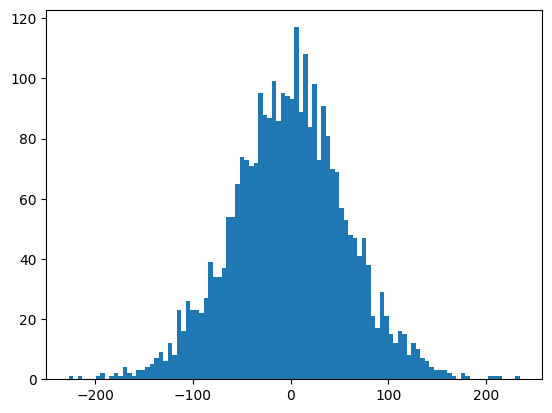

In [45]:
print(vit.shape)
import random

random_pair_inds=[random.randint(0,6902) for x in range(0,3)]
print(random_pair_inds)
vs=[]
for i in range(0,1000):
    vs.append(np.random.randn(1000))
vs=np.array(vs)
scores=[]
diffs=[]
for pair in random_pair_inds:
    two_vecs=vit[list(pairs[pair])]
    diff=two_vecs[0]-two_vecs[1]
    #print(diff)
    score=diff.T@vs
    scores.append(score)
    diffs.append(diff)
scores=np.array(scores)
print(scores)
print(scores.shape)
plt.hist(scores.flatten(),bins=100)


Text(0.5, 1.0, 'Feasible directions vs. number of constraints')

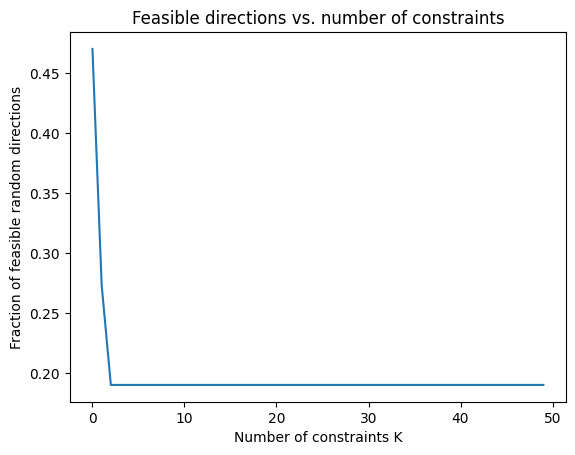

In [46]:
import numpy as np
import matplotlib.pyplot as plt

# Simulation parameters
D = 1000          # dimensionality
num_dirs = 300    # random directions
num_pairs = 50    # constraints to test up to K = 50

# Generate random difference vectors (like x_i - x_j)
#diffs = np.random.randn(num_pairs, D)

# Generate random directions and normalize them
vs = np.random.randn(num_dirs, D)
vs = vs / np.linalg.norm(vs, axis=1, keepdims=True)

fractions = []

for K in range(1, num_pairs + 1):
    current_diffs = diffs[:K]                      # shape (K, D)
    dots = current_diffs @ vs.T                   # shape (K, num_dirs)
    feasible = np.all(dots > 0, axis=0)           # each direction satisfies ALL K constraints
    frac = feasible.mean()
    fractions.append(frac)

plt.plot(fractions)
plt.xlabel("Number of constraints K")
plt.ylabel("Fraction of feasible random directions")
plt.title("Feasible directions vs. number of constraints")

